# **O Perceptron Simples:**
Implementando um perceptron para simular a porla lógica AND. Depois testar a porta XOR.

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, dim_entrada, taxa_aprendizado=0.01, epocas=100):
        self.dim_entrada = dim_entrada
        self.taxa_aprendizado = taxa_aprendizado
        self.epocas = epocas
        self.pesos = np.random.rand(dim_entrada + 1)  # +1 para o bias
        self.erros = []

    # Funcao Degrau
    def funcao_ativacao(self, x):
        return 1 if x >= 0 else 0

    # Funcao de Predicao
    def predicao(self, X):
        X_with_bias = np.c_[X, np.ones(len(X))]
        return np.array([self.funcao_ativacao(np.dot(x, self.pesos)) for x in X_with_bias])

    # Funcao de treinamento
    def treina(self, X, y):
        X_with_bias = np.c_[X, np.ones(len(X))]
        for _ in range(self.epocas):
            total_erro = 0
            for i in range(len(X_with_bias)):
                erro = y[i] - self.funcao_ativacao(np.dot(X_with_bias[i], self.pesos))
                self.pesos += self.taxa_aprendizado * erro * X_with_bias[i]
                total_erro += int(erro != 0)
            self.erros.append(total_erro)

# Exemplo de uso (AND)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

perceptron = Perceptron(dim_entrada=2, taxa_aprendizado=0.1, epocas=100)
perceptron.treina(X, y)

# Testando a previsão
print("Esperado:", y)
print("Previsão:", perceptron.predicao(X))

#Pesos
print("Pesos sinápticos:", perceptron.pesos)

Esperado: [0 0 0 1]
Previsão: [0 0 0 1]
Pesos sinápticos: [ 0.27143338  0.13791667 -0.32031544]


# A rede Percetron de Multiplas Camadas, ou rede MLP.

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


class MLP:
    def __init__(self, dim_entrada, dim_oculta, dim_saida, taxa_aprendizado=0.01):
        self.dim_entrada = dim_entrada
        self.dim_oculta = dim_oculta
        self.dim_saida = dim_saida
        self.taxa_aprendizado = taxa_aprendizado

        # Inicialização dos pesos e bias das camadas oculta e de saída
        self.pesos_ocultos = np.random.rand(self.dim_entrada, self.dim_oculta)
        self.bias_ocultos = np.zeros(self.dim_oculta)

        self.pesos_saida = np.random.rand(self.dim_oculta, self.dim_saida)
        self.bias_saida = np.zeros(self.dim_saida)

    # Funcao de Ativacao Sigmoide
    def sigmoide(self, x):
        return 1 / (1 + np.exp(-x))

    # Derivada Primeirada Funcao de Ativacao Sigmoide
    def sigmoide_derivada(self, x):
        return x * (1 - x)

    # Calculo da saída da rede MLP
    def feedforward(self, X):
        # Calculo da saida da Camada oculta
        camada_oculta_entrada = np.dot(X, self.pesos_ocultos) + self.bias_ocultos
        camada_oculta_saida = self.sigmoide(camada_oculta_entrada)

        # Calculo da saida da Camada de saída
        camada_saida_entrada = np.dot(camada_oculta_saida, self.pesos_saida) + self.bias_saida
        saida = self.sigmoide(camada_saida_entrada)

        return camada_oculta_saida, saida

    def backpropagation(self, X, y, camada_oculta_saida, saida):
        # Backpropagation
        saida_erro = y - saida
        saida_delta = saida_erro * self.sigmoide_derivada(saida)

        camada_oculta_erro = saida_delta.dot(self.pesos_saida.T)
        camada_oculta_delta = camada_oculta_erro * self.sigmoide_derivada(camada_oculta_saida)

        # Atualização dos pesos e bias
        self.pesos_saida += camada_oculta_saida.T.dot(saida_delta) * self.taxa_aprendizado
        self.bias_saida += np.sum(saida_delta, axis=0) * self.taxa_aprendizado

        self.pesos_ocultos += X.T.dot(camada_oculta_delta) * self.taxa_aprendizado
        self.bias_ocultos += np.sum(camada_oculta_delta, axis=0) * self.taxa_aprendizado

    def fit(self, X, y, epocas=1000):
        for epoca in range(epocas):
            # Forward propagation
            camada_oculta_saida, saida = self.feedforward(X)
            # Backpropagation
            self.backpropagation(X, y, camada_oculta_saida, saida)

    def predicao(self, X):
        _, saida = self.feedforward(X)
        return saida

    # Função para plotar a superfície de decisão
    def plot_decision_surface(self, X, y):
      h = .02  # Passo da grade
      x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
      grid_points = np.c_[xx.ravel(), yy.ravel()]

      Z = self.predicao(grid_points)
      Z = Z.reshape(xx.shape)

      cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
      cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

      plt.figure(figsize=(8, 6))
      plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

      # Plotar os pontos de treinamento
      plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Superfície de Decisão da Rede MLP")
      plt.xlabel("Feature 1")
      plt.ylabel("Feature 2")
      plt.show()

In [3]:
#Programa Principal
# Gerando dados de exemplo
#X, y = make_classification(n_samples=200, class_sep=0.5, n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=2)
X, y = make_moons(n_samples=100, shuffle=True, noise=0.5, random_state=None)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape dos rótulos para se adequar ao formato de saída da rede
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

# Criando e treinando a MLP
mlp = MLP(dim_entrada=2, dim_oculta=10, dim_saida=1, taxa_aprendizado=0.1)
mlp.fit(X_train, y_train, epocas=1000)

# Realizando previsões no conjunto de teste
saida_prevista = mlp.predicao(X_test)

# Convertendo as previsões para classes (0 ou 1)
predicao_classes = (saida_prevista > 0.5).astype(int)

# Calculando a acurácia
acuracia = np.mean(predicao_classes == y_test)
print(f'Acurácia da MLP: {acuracia}')

Acurácia da MLP: 0.8


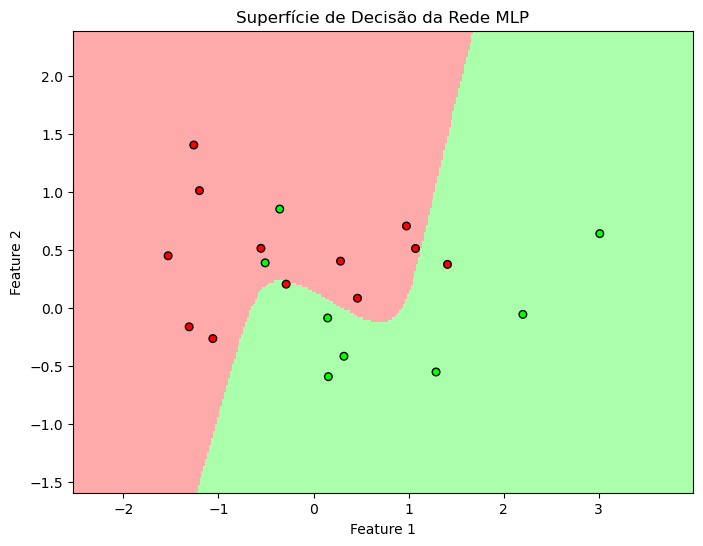

In [4]:
mlp.plot_decision_surface(X_test, y_test)